In [27]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,uniform,randint

#Sklearn imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_val_predict,validation_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

%matplotlib inline

In [5]:
data=pd.read_csv(r"task_data.csv")

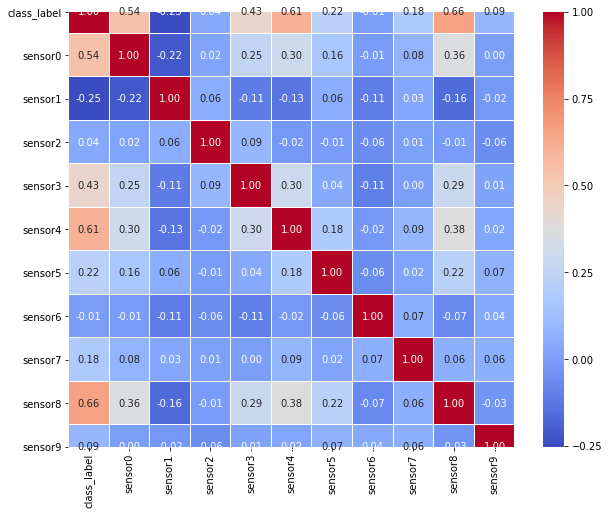

In [11]:
correl=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(correl,xticklabels=correl.columns.values,
            yticklabels=correl.columns.values,annot=True,cmap="coolwarm",fmt="0.2f",linewidth=0.01)

In [12]:
correl['class_label'].sort_values(ascending=False)#just the values on whom the correltion of class label seems to b more

class_label    1.000000
sensor8        0.660618
sensor4        0.607623
sensor0        0.543295
sensor3        0.433636
sensor5        0.224147
sensor7        0.175612
sensor9        0.094907
sensor2        0.038775
sensor6       -0.007414
sensor1       -0.252007
Name: class_label, dtype: float64

In [13]:
all_features=['sensor0','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9']
y=data['class_label']
x=data[all_features]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) #Basic train_test_split works here

print ("Shape of x_train: ", x_train.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of x_test: ", x_test.shape)
print ("Shape of y_test: ", y_test.shape)

#Data is well balanced between the 2 classes in both train/test
print ("\nValue counts for y_train:\n", y_train.value_counts())
print ("\nValue counts for y_test:\n", y_test.value_counts())

Shape of x_train:  (300, 10)
Shape of y_train:  (300,)
Shape of x_test:  (100, 10)
Shape of y_test:  (100,)

Value counts for y_train:
 -1.0    155
 1.0    145
Name: class_label, dtype: int64

Value counts for y_test:
  1.0    55
-1.0    45
Name: class_label, dtype: int64


In [14]:
print ("\nx_train descriptive statistics:\n\n",x_train.agg([np.mean, np.std]))
print ("\nx_test descriptive statistics:\n\n",x_test.agg([np.mean, np.std]))# all data seem to b standardised..


x_train descriptive statistics:

        sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
mean  0.511902  0.523074  0.476630  0.500287  0.499266  0.493760  0.488285   
std   0.268923  0.278430  0.290607  0.299196  0.291945  0.285576  0.286744   

       sensor7   sensor8   sensor9  
mean  0.483622  0.465155  0.558526  
std   0.282803  0.295358  0.265498  

x_test descriptive statistics:

        sensor0   sensor1   sensor2   sensor3   sensor4   sensor5   sensor6  \
mean  0.558937  0.467670  0.495063  0.538146  0.493703  0.522980  0.497067   
std   0.264187  0.269271  0.279291  0.292859  0.278085  0.294083  0.300758   

       sensor7   sensor8   sensor9  
mean  0.478621  0.535824  0.492154  
std   0.283837  0.293756  0.288140  


In [15]:
def classification_accuracy_report(actual,predicted):
    print ("\nAccuracy Score on Test Data: ", accuracy_score(actual,predicted))
    print ("\nConfusion Matrix on Test Data:\n", confusion_matrix(actual,predicted))
    print ("\nClassification Report on Test Data:\n",classification_report(actual,predicted))

In [19]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)# logistic regression model

C:\Users\ADITYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
y_pred=clf.predict(x_test)# predicted labels

In [21]:
clf.score(x_test, y_test)

0.89

In [23]:
classification_accuracy_report(y_test,y_pred)


Accuracy Score on Test Data:  0.89

Confusion Matrix on Test Data:
 [[39  6]
 [ 5 50]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.89      0.87      0.88        45
         1.0       0.89      0.91      0.90        55

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [24]:
def features_rank(feature_importance_coefficients,index_labels):
    feature_importance_coefficients=map(abs,feature_importance_coefficients)
    feature_with_coeff=zip(feature_importance_coefficients,index_labels)
    print ("\nFeatures and their importances:\n", feature_with_coeff)
    ranked_features=sorted(feature_with_coeff, key=lambda x: x[0],reverse=True)
    print ("\nRanked Features:\n", [elem[1] for elem in ranked_features])

In [28]:
sgd_classifier=linear_model.SGDClassifier(max_iter=10000,loss='log',penalty='l2',random_state=42)
scores=cross_val_score(sgd_classifier,x_train,y_train,cv=5)
print ("l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER\n")
print ("Cross Validation Scores on the training set: ", scores)

sgd_classifier.fit(x_train,y_train)
y_pred = sgd_classifier.predict(x_test)

classification_accuracy_report(y_test,y_pred)

coeff_list=list(itertools.chain(*sgd_classifier.coef_.tolist())) #Converting numpy array to list and then flattening
features_rank(coeff_list,all_features)

l2 REGULARIZED LOGISTIC REGRESSION (log loss) USING STOCHASTIC GRADIENT DESCENT OPTIMIZER

Cross Validation Scores on the training set:  [0.85       0.91666667 0.86666667 0.95       0.96666667]

Accuracy Score on Test Data:  0.88

Confusion Matrix on Test Data:
 [[35 10]
 [ 2 53]]

Classification Report on Test Data:
               precision    recall  f1-score   support

        -1.0       0.95      0.78      0.85        45
         1.0       0.84      0.96      0.90        55

    accuracy                           0.88       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.88      0.88       100


Features and their importances:

Ranked Features:
 ['sensor8', 'sensor4', 'sensor0', 'sensor3', 'sensor9', 'sensor7', 'sensor1', 'sensor6', 'sensor2', 'sensor5']
